<a href="https://colab.research.google.com/github/shahdhruvp16/Checkers-Game-Using-AI/blob/main/python/Part_2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install conda and rdkit**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-11-10 09:30:32--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   130MB/s    in 0.6s    

2024-11-10 09:30:33 (130 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=

## **Load bioactivity data**

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

In [6]:
!pip install rdkit

     |████████████████████████████████| 29.5 MB 1.4 MB/s 


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [7]:
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [8]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [9]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [10]:
df_lipinski

MW    LogP  NumHDonors  NumHAcceptors
0   796.992  1.0006        10.0           14.0
1   507.428  4.3004         2.0            3.0
2  4331.996 -9.9754        59.0           60.0
3   574.747  3.6599         2.0            5.0
4   542.036  3.9395         1.0           10.0
5   430.585  5.7974         1.0            4.0

from matplotlib import pyplot as plt
df_lipinski['MW'].plot(kind='hist', bins=20, title='MW')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_lipinski['LogP'].plot(kind='hist', bins=20, title='LogP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_lipinski['NumHDonors'].plot(kind='hist', bins=20, title='NumHDonors')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_lipinski['NumHAcceptors'].plot(kind='hist', bins=20, title='NumHAcceptors')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_lipinski.plot(kind='scatter', x='MW', y='LogP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_lipinski.plot(kind='scatter', x='LogP', y='NumHDonors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_lipinski.plot(kind='scatter', x='NumHDonors', y='NumHAcceptors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_lipinski['MW'].plot(kind='line', figsize=(8, 4), title='MW')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_lipinski['LogP'].plot(kind='line', figsize=(8, 4), title='LogP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_lipinski['NumHDonors'].plot(kind='line', figsize=(8, 4), title='NumHDonors')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_lipinski['NumHAcceptors'].plot(kind='line', figsize=(8, 4), title='NumHAcceptors')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
df

molecule_chembl_id                                   canonical_smiles  \
0      CHEMBL4763715  C[C@H]1O[C@@](O)(O[C@H]2CC[C@@]3(C)[C@@H](CC[C...   
1      CHEMBL5270175  O=C(NC(Cc1ccccc1)C(=O)N1CCC(O)(c2ccc(Br)cc2)CC...   
2      CHEMBL5283406  CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...   
3        CHEMBL91704  CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...   
4       CHEMBL217092  CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...   
5      CHEMBL5278230  C=C(C=O)[C@H]1CC=C2[C@H](OC(=O)/C(C)=C/CCCCCCC...   

   standard_value  
0         1700.00  
1          700.00  
2         3350.00  
3            1.48  
4         5100.00  
5        18100.00

from matplotlib import pyplot as plt
df['standard_value'].plot(kind='hist', bins=20, title='standard_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('molecule_chembl_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('canonical_smiles').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['standard_value'].plot(kind='line', figsize=(8, 4), title='standard_value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['canonical_smiles'].value_counts()
    for x_label, grp in df.groupby('molecule_chembl_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('molecule_chembl_id')
_ = plt.ylabel('canonical_smiles')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['molecule_chembl_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='standard_value', y='molecule_chembl_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['canonical_smiles'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='standard_value', y='canonical_smiles', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Now, let's combine the 2 DataFrame

In [12]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [13]:
df_combined

molecule_chembl_id                                   canonical_smiles  \
0      CHEMBL4763715  C[C@H]1O[C@@](O)(O[C@H]2CC[C@@]3(C)[C@@H](CC[C...   
1      CHEMBL5270175  O=C(NC(Cc1ccccc1)C(=O)N1CCC(O)(c2ccc(Br)cc2)CC...   
2      CHEMBL5283406  CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...   
3        CHEMBL91704  CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...   
4       CHEMBL217092  CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...   
5      CHEMBL5278230  C=C(C=O)[C@H]1CC=C2[C@H](OC(=O)/C(C)=C/CCCCCCC...   

   standard_value        MW    LogP  NumHDonors  NumHAcceptors  
0         1700.00   796.992  1.0006        10.0           14.0  
1          700.00   507.428  4.3004         2.0            3.0  
2         3350.00  4331.996 -9.9754        59.0           60.0  
3            1.48   574.747  3.6599         2.0            5.0  
4         5100.00   542.036  3.9395         1.0           10.0  
5        18100.00   430.585  5.7974         1.0            4.0

from matplotlib import pyplot as plt
df_combined['standard_value'].plot(kind='hist', bins=20, title='standard_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_combined['MW'].plot(kind='hist', bins=20, title='MW')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_combined['LogP'].plot(kind='hist', bins=20, title='LogP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_combined['NumHDonors'].plot(kind='hist', bins=20, title='NumHDonors')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_combined.groupby('molecule_chembl_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_combined.groupby('canonical_smiles').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_combined.plot(kind='scatter', x='standard_value', y='MW', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_combined.plot(kind='scatter', x='MW', y='LogP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_combined.plot(kind='scatter', x='LogP', y='NumHDonors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_combined.plot(kind='scatter', x='NumHDonors', y='NumHAcceptors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_combined['standard_value'].plot(kind='line', figsize=(8, 4), title='standard_value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_combined['MW'].plot(kind='line', figsize=(8, 4), title='MW')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_combined['LogP'].plot(kind='line', figsize=(8, 4), title='LogP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_combined['NumHDonors'].plot(kind='line', figsize=(8, 4), title='NumHDonors')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['canonical_smiles'].value_counts()
    for x_label, grp in df_combined.groupby('molecule_chembl_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('molecule_chembl_id')
_ = plt.ylabel('canonical_smiles')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_combined['molecule_chembl_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_combined, x='standard_value', y='molecule_chembl_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_combined['canonical_smiles'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_combined, x='standard_value', y='canonical_smiles', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_combined['molecule_chembl_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_combined, x='MW', y='molecule_chembl_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_combined['canonical_smiles'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_combined, x='MW', y='canonical_smiles', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [14]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        pIC50_value = -np.log10(i * (10**-9))  # Example calculation for pIC50
        pIC50.append(pIC50_value)

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x


Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [15]:
df_combined.standard_value.describe()

count        6.000000
mean      4825.246667
std       6760.539473
min          1.480000
25%        950.000000
50%       2525.000000
75%       4662.500000
max      18100.000000
Name: standard_value, dtype: float64

In [18]:
-np.log10( (10**-9)* 100000000 )

1.0

In [16]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [17]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x


We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [19]:
df_norm = norm_value(df_combined)
df_norm

molecule_chembl_id                                   canonical_smiles  \
0      CHEMBL4763715  C[C@H]1O[C@@](O)(O[C@H]2CC[C@@]3(C)[C@@H](CC[C...   
1      CHEMBL5270175  O=C(NC(Cc1ccccc1)C(=O)N1CCC(O)(c2ccc(Br)cc2)CC...   
2      CHEMBL5283406  CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...   
3        CHEMBL91704  CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...   
4       CHEMBL217092  CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...   
5      CHEMBL5278230  C=C(C=O)[C@H]1CC=C2[C@H](OC(=O)/C(C)=C/CCCCCCC...   

         MW    LogP  NumHDonors  NumHAcceptors  standard_value_norm  
0   796.992  1.0006        10.0           14.0              1700.00  
1   507.428  4.3004         2.0            3.0               700.00  
2  4331.996 -9.9754        59.0           60.0              3350.00  
3   574.747  3.6599         2.0            5.0                 1.48  
4   542.036  3.9395         1.0           10.0              5100.00  
5   430.585  5.7974         1.0            4.0             18100.00

from matplotlib import pyplot as plt
df_norm['MW'].plot(kind='hist', bins=20, title='MW')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_norm['LogP'].plot(kind='hist', bins=20, title='LogP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_norm['NumHDonors'].plot(kind='hist', bins=20, title='NumHDonors')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_norm['NumHAcceptors'].plot(kind='hist', bins=20, title='NumHAcceptors')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_norm.groupby('molecule_chembl_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_norm.groupby('canonical_smiles').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_norm.plot(kind='scatter', x='MW', y='LogP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_norm.plot(kind='scatter', x='LogP', y='NumHDonors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_norm.plot(kind='scatter', x='NumHDonors', y='NumHAcceptors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_norm.plot(kind='scatter', x='NumHAcceptors', y='standard_value_norm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_norm['MW'].plot(kind='line', figsize=(8, 4), title='MW')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_norm['LogP'].plot(kind='line', figsize=(8, 4), title='LogP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_norm['NumHDonors'].plot(kind='line', figsize=(8, 4), title='NumHDonors')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_norm['NumHAcceptors'].plot(kind='line', figsize=(8, 4), title='NumHAcceptors')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['canonical_smiles'].value_counts()
    for x_label, grp in df_norm.groupby('molecule_chembl_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('molecule_chembl_id')
_ = plt.ylabel('canonical_smiles')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_norm['molecule_chembl_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_norm, x='MW', y='molecule_chembl_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_norm['canonical_smiles'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_norm, x='MW', y='canonical_smiles', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_norm['molecule_chembl_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_norm, x='LogP', y='molecule_chembl_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_norm['canonical_smiles'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_norm, x='LogP', y='canonical_smiles', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [20]:
df_norm.standard_value_norm.describe()

count        6.000000
mean      4825.246667
std       6760.539473
min          1.480000
25%        950.000000
50%       2525.000000
75%       4662.500000
max      18100.000000
Name: standard_value_norm, dtype: float64

In [21]:
df_final = pIC50(df_norm)
df_final

molecule_chembl_id                                   canonical_smiles  \
0      CHEMBL4763715  C[C@H]1O[C@@](O)(O[C@H]2CC[C@@]3(C)[C@@H](CC[C...   
1      CHEMBL5270175  O=C(NC(Cc1ccccc1)C(=O)N1CCC(O)(c2ccc(Br)cc2)CC...   
2      CHEMBL5283406  CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...   
3        CHEMBL91704  CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...   
4       CHEMBL217092  CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...   
5      CHEMBL5278230  C=C(C=O)[C@H]1CC=C2[C@H](OC(=O)/C(C)=C/CCCCCCC...   

         MW    LogP  NumHDonors  NumHAcceptors     pIC50  
0   796.992  1.0006        10.0           14.0  5.769551  
1   507.428  4.3004         2.0            3.0  6.154902  
2  4331.996 -9.9754        59.0           60.0  5.474955  
3   574.747  3.6599         2.0            5.0  8.829738  
4   542.036  3.9395         1.0           10.0  5.292430  
5   430.585  5.7974         1.0            4.0  4.742321

from matplotlib import pyplot as plt
df_final['MW'].plot(kind='hist', bins=20, title='MW')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_final['LogP'].plot(kind='hist', bins=20, title='LogP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_final['NumHDonors'].plot(kind='hist', bins=20, title='NumHDonors')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_final['NumHAcceptors'].plot(kind='hist', bins=20, title='NumHAcceptors')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_final.groupby('molecule_chembl_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_final.groupby('canonical_smiles').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_final.groupby('bioactivity_class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_final.plot(kind='scatter', x='MW', y='LogP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_final.plot(kind='scatter', x='LogP', y='NumHDonors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_final.plot(kind='scatter', x='NumHDonors', y='NumHAcceptors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_final.plot(kind='scatter', x='NumHAcceptors', y='pIC50', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_final['MW'].plot(kind='line', figsize=(8, 4), title='MW')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_final['LogP'].plot(kind='line', figsize=(8, 4), title='LogP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_final['NumHDonors'].plot(kind='line', figsize=(8, 4), title='NumHDonors')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_final['NumHAcceptors'].plot(kind='line', figsize=(8, 4), title='NumHAcceptors')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['canonical_smiles'].value_counts()
    for x_label, grp in df_final.groupby('molecule_chembl_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('molecule_chembl_id')
_ = plt.ylabel('canonical_smiles')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['bioactivity_class'].value_counts()
    for x_label, grp in df_final.groupby('canonical_smiles')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('canonical_smiles')
_ = plt.ylabel('bioactivity_class')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_final['molecule_chembl_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_final, x='MW', y='molecule_chembl_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_final['canonical_smiles'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_final, x='MW', y='canonical_smiles', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_final['bioactivity_class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_final, x='MW', y='bioactivity_class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_final['molecule_chembl_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_final, x='LogP', y='molecule_chembl_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [22]:
df_final.pIC50.describe()

count    6.000000
mean     6.043983
std      1.444368
min      4.742321
25%      5.338061
50%      5.622253
75%      6.058564
max      8.829738
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [23]:
print(df_final.columns)


Index(['molecule_chembl_id', 'canonical_smiles', 'MW', 'LogP', 'NumHDonors',
       'NumHAcceptors', 'pIC50'],
      dtype='object')


In [24]:
# Define a function to classify bioactivity based on pIC50 values
def classify_bioactivity(row):
    if row['pIC50'] >= 6:
        return 'active'
    elif row['pIC50'] < 5:
        return 'inactive'
    else:
        return 'intermediate'

# Apply the function to create the bioactivity_class column in df_final
df_final['bioactivity_class'] = df_final.apply(classify_bioactivity, axis=1)

# Filter out rows with 'intermediate' bioactivity_class
df_2class = df_final[df_final['bioactivity_class'] != 'intermediate']




---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [25]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

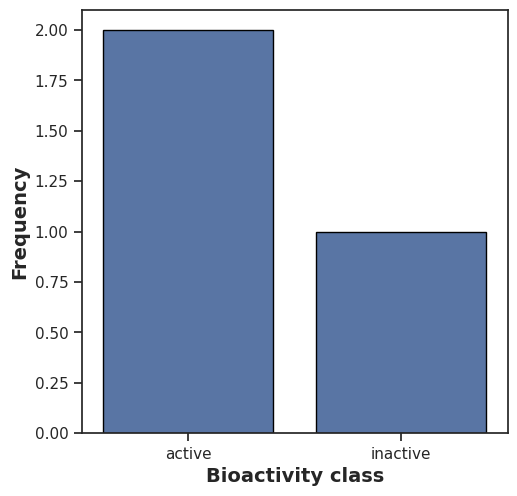

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

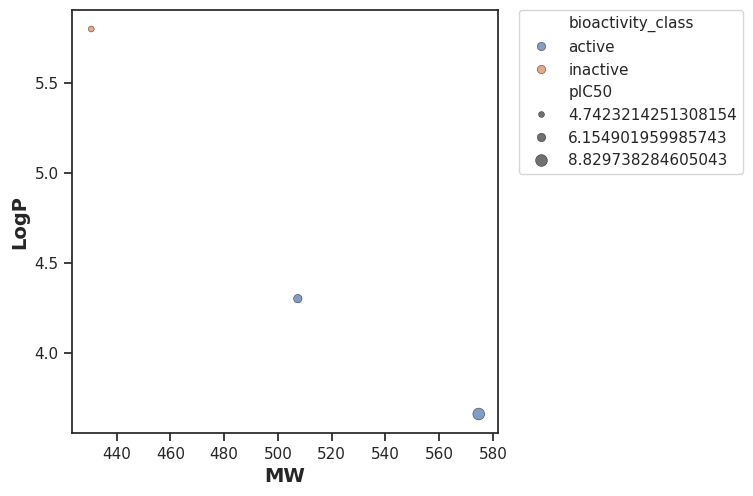

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

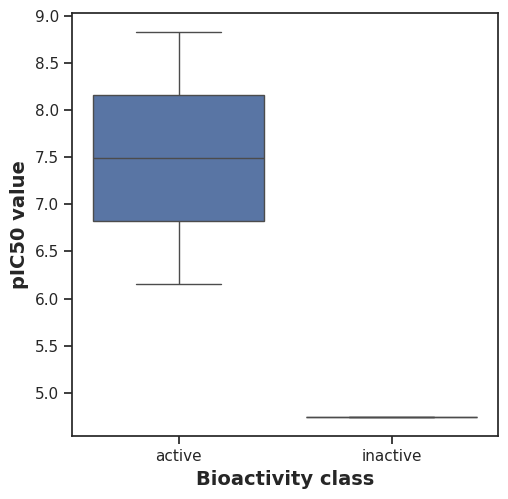

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [29]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [30]:
mannwhitney('pIC50')

Descriptor  Statistics         p  alpha  \
0      pIC50         2.0  0.666667   0.05   

                          Interpretation  
0  Same distribution (fail to reject H0)

#### **MW**

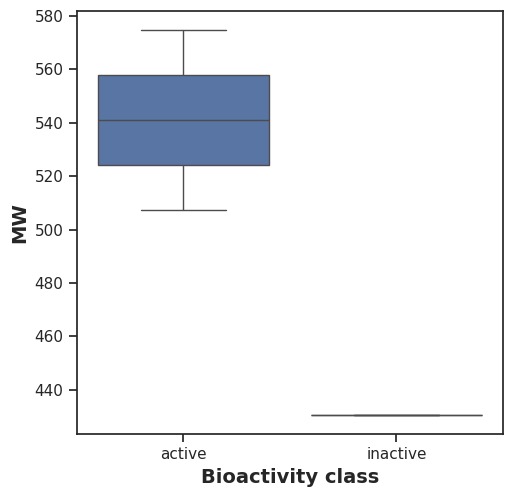

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [32]:
mannwhitney('MW')

Descriptor  Statistics         p  alpha  \
0         MW         2.0  0.666667   0.05   

                          Interpretation  
0  Same distribution (fail to reject H0)

#### **LogP**

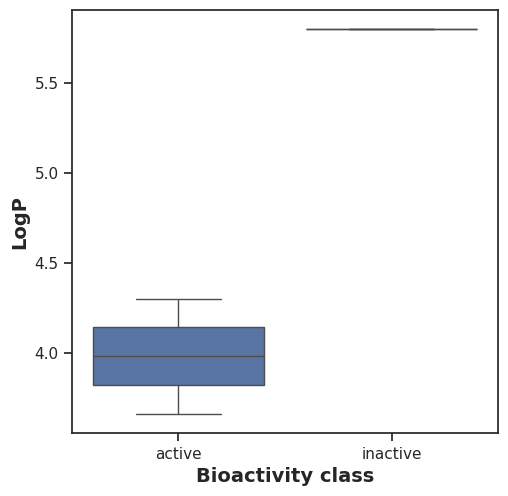

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [34]:
mannwhitney('LogP')

Descriptor  Statistics         p  alpha  \
0       LogP         0.0  0.666667   0.05   

                          Interpretation  
0  Same distribution (fail to reject H0)

#### **NumHDonors**

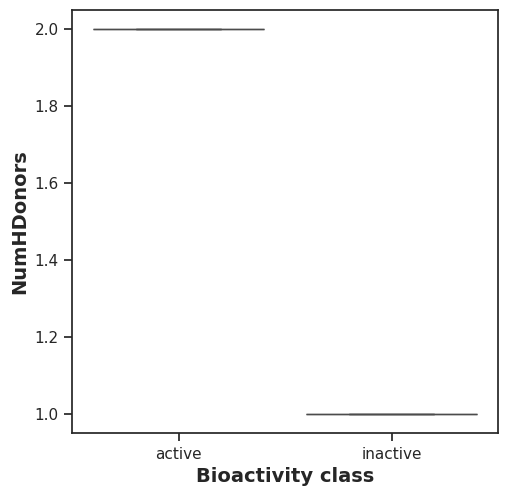

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [36]:
mannwhitney('NumHDonors')

Descriptor  Statistics       p  alpha  \
0  NumHDonors         2.0  0.4795   0.05   

                          Interpretation  
0  Same distribution (fail to reject H0)

#### **NumHAcceptors**

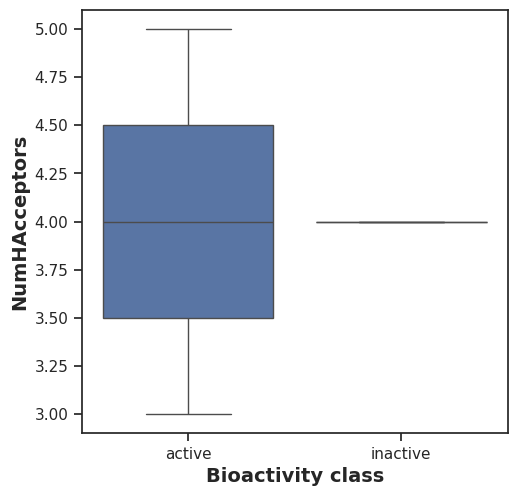

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [38]:
mannwhitney('NumHAcceptors')

Descriptor  Statistics    p  alpha  \
0  NumHAcceptors         1.0  1.0   0.05   

                          Interpretation  
0  Same distribution (fail to reject H0)

#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [39]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_MW_vs_LogP.pdf (deflated 33%)
  adding: mannwhitneyu_LogP.csv (deflated 17%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: mannwhitneyu_MW.csv (deflated 15%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 40%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 17%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: bioactivity_preprocessed_data.csv (deflated 68%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
